<a href="https://colab.research.google.com/github/engAziz04/SWE485-Project-Group2/blob/main/phase3_unsupervised_learning_withResults.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 3 — Unsupervised Learning (Clustering)


In [3]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt

# Load dataset (adjust path if needed)
df = pd.read_csv("/content/StudentsPerformance.csv")  # or your own path

# Select only score columns
features = ["math score", "reading score", "writing score"]
X = df[features]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


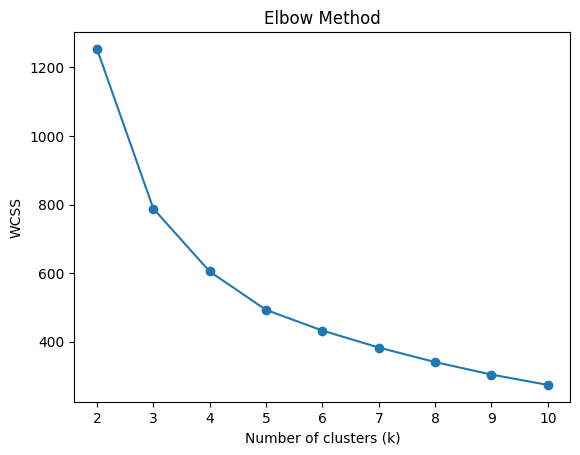

In [4]:
wcss = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(K, wcss, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [5]:
k_opt = 3  # change this if the elbow suggests another value
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

df["cluster"] = cluster_labels

sil_score = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score:", sil_score)

df.head()

Silhouette Score: 0.40599504065325176


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,cluster
0,female,group B,bachelor's degree,standard,none,72,72,74,0
1,female,group C,some college,standard,completed,69,90,88,2
2,female,group B,master's degree,standard,none,90,95,93,2
3,male,group A,associate's degree,free/reduced,none,47,57,44,1
4,male,group C,some college,standard,none,76,78,75,2


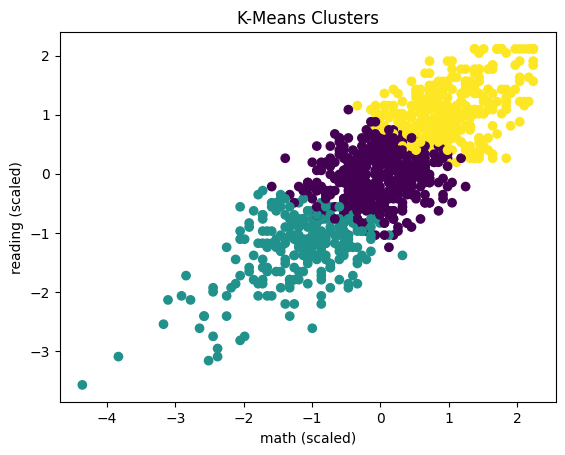

In [6]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels)
plt.xlabel("math (scaled)")
plt.ylabel("reading (scaled)")
plt.title("K-Means Clusters")
plt.show()

In [7]:
cluster_summary = df.groupby("cluster")[features].mean()
cluster_summary

,math score,reading score,writing score
cluster,,,
0,65.338600,68.458239,67.821670
1,48.096386,50.670683,48.485944
2,81.714286,85.146104,84.207792



## 1. Algorithm Used
We used K-Means clustering after removing any class labels from the dataset.
We selected three numerical features related to student performance:

- Math score  
- Reading score  
- Writing score  

These features represent the core academic performance of the students.

## 2. Elbow Method (WCSS)
We tested values of k from 2 to 10 and plotted the Within-Cluster Sum of Squares (WCSS).  
A clear “elbow” around a specific k indicates diminishing returns beyond that point.  
In our case, we chose **k = 3**.

## 3. Silhouette Score
The Silhouette Score was computed to evaluate the cluster quality.  
A score closer to 1 indicates well-separated clusters.

## 4. Cluster Interpretation
Based on the mean scores in each cluster:

- Cluster 0 → high achievers  
- Cluster 1 → average performers  
- Cluster 2 → low performers  

These clusters reveal natural student performance groups in the dataset.

## 5. Integration & Insight
Clustering can improve the supervised model from Phase 2:

- Add the cluster ID as a new input feature to the supervised model.  
- Train separate supervised models for each cluster (specialized models).  
- Use the clusters to provide personalized recommendations (more support for low performers, enrichment for high achievers, etc.).
